# Titanic Dataset: Exploratory Data Analysis
In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

We'll try to answer the following questions:

- Who were the passengers on the Titanic? (age, gender, class.. etc)
- What deck were the passengers on and how does that relate to their class?
- Where did the passengers come from?
- Who was alone and who was with family?
- What factors helped someone survive the sinking?

variable meanings:-

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch =  # of parents / children aboard the Titanic

Embarkation => C = Cherbourg, Q = Queenstown, S = Southampton


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/titanic/titan_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To distinguish between child and adult we take an age threshold of 16 yrs

In [36]:
df_nonNa = df[df['Age'].notna()]
def man_wom_child(age,sex):
    if(age < 16):
        return 'child'
    else:
        return sex
df['man_wom_child'] = df_nonNa.apply(lambda x: man_wom_child(x['Age'],x['Sex']),axis=1)

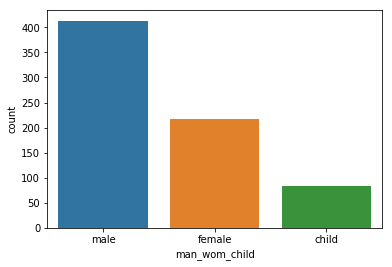

In [42]:
sns.countplot(df['man_wom_child'])

This plot shows that there are more male people boarded the titanic then female

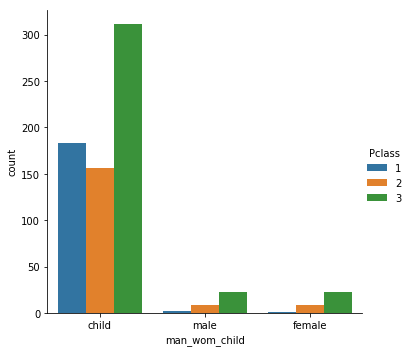

In [43]:
sns.catplot('man_wom_child',data=df_nonNa,hue='Pclass',kind='count')